In [162]:
# Dependencies
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Keys
from config import (api_key)

In [163]:
#B01003_001E Population
#B23025_005E Unemployement count
#B02001_001E Race
# 2013 Data
year = [2013, 2014, 2015, 2016, 2017, 2018]
c = Census(api_key, year=year)

year_column = []
states_list=[]
years_list=[]
population =[]
un_count =[]
# race_data =[]
state_number = []
combined_data = pd.DataFrame()



#Convert to DataFrame
for x in year:
    c = Census(api_key, year=x)
    
    census_data = c.acs5.get(("NAME", "B01003_001E", "B23025_005E"), {'for': 'state:06,08, 12, 16, 41, 48'})
   
    census_data_pd = pd.DataFrame(census_data).sort_values("NAME", ascending=True)
    census_data_pd = census_data_pd.reset_index()
    
    for y in range(len(census_data_pd["state"])):
        year_column.append(x)


    census_pd = pd.DataFrame(census_data) 
    years_list.extend(year_column)
    state_number.extend(census_pd["state"].tolist())
    states_list.extend(census_pd["NAME"].tolist())
    population.extend(census_pd["B01003_001E"].tolist())
    un_count.extend(census_pd["B23025_005E"].tolist())
#     race_data.extend(census_pd["B02001_001E"].tolist())
  

In [164]:
combined_data["Year"] = year_column
combined_data["State Name"] = states_list
combined_data["State Number"] = state_number
combined_data["Population"] = population
combined_data["Unemployment Count"] = un_count
# combined_data["Race"] = race_data

In [165]:
combined_data

,Year,State Name,State Number,Population,Unemployment Count
0,2013,California,06,37659181.0,2168665.0
1,2013,Colorado,08,5119329.0,231741.0
2,2013,Florida,12,19091156.0,1096028.0
3,2013,Idaho,16,1583364.0,67189.0
4,2013,Oregon,41,3868721.0,221191.0
5,2013,Texas,48,25639373.0,1020132.0
6,2014,California,06,38066920.0,2084564.0
7,2014,Colorado,08,5197580.0,219241.0
8,2014,Florida,12,19361792.0,1024905.0
9,2014,Idaho,16,1599464.0,61837.0


In [166]:
cali_data = combined_data.loc[combined_data["State Name"]== "California"]
texas_data = combined_data.loc[combined_data["State Name"]== "Texas"]
col_data = combined_data.loc[combined_data["State Name"]== "Colorado"]
flo_data = combined_data.loc[combined_data["State Name"]== "Florida"]
ida_data = combined_data.loc[combined_data["State Name"]== "Idaho"]

cali_data

,Year,State Name,State Number,Population,Unemployment Count
0,2013,California,06,37659181.0,2168665.0
6,2014,California,06,38066920.0,2084564.0
12,2015,California,06,38421464.0,1891081.0
18,2016,California,06,38654206.0,1683726.0
24,2017,California,06,38982847.0,1491146.0
32,2018,California,06,39148760.0,1321502.0


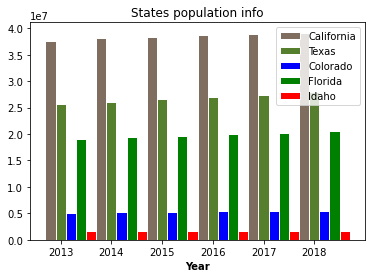

In [149]:

# set width of bar
barWidth = 0.2
#[cali_data["Population"], texas_data["Population"], col_data["Population"],flo_data["Population"], ida_data["Population"]]
# set height of bar
bars1 = cali_data["Population"]
bars2 = texas_data["Population"]
bars3 = col_data["Population"]
bars4 = flo_data["Population"]
bars5 = ida_data["Population"]
# Set position of bar on X axis

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='California')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Texas')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Colorado')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='Florida')
plt.bar(r5, bars5, color='red', width=barWidth, edgecolor='white', label='Idaho')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])

# Create legend & Show graphic
plt.title("States population info")
plt.legend()
plt.show()


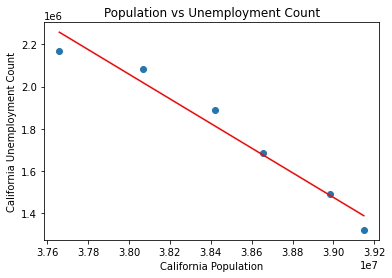

In [158]:
x_values = cali_data["Population"]
y_values = cali_data['Unemployment Count']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Unemployment Count")
plt.show()

The P Value is :1.4869183698564236e-05


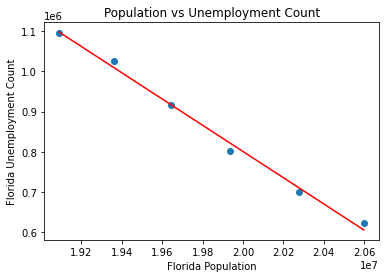

In [159]:
x_values = flo_data["Population"]
y_values = flo_data['Unemployment Count']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"red")
# plt.annotate(line_eq,(2,1),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.xlabel("Florida Population")
plt.ylabel("Florida Unemployment Count")
plt.title("Population vs Unemployment Count")
print(f"The P Value is :{pvalue}")
plt.show()


In [72]:
x_values = flo_data["Population"]
y_values = flo_data['Unemployment Count']
plt.scatter(x_values, y_values)
plt.xlabel("Florida Population")
plt.ylabel("Florida Unemployment Count")
plt.title("Population vs Unemployment Count")
plt.show()

0    37659181.0
1    38066920.0
2    38421464.0
3    38654206.0
4    38982847.0
5    39148760.0
Name: Population, dtype: float64

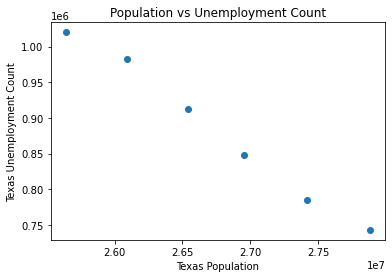

In [95]:
x_values = texas_data["Population"]
y_values = texas_data['Unemployment Count']
plt.scatter(x_values, y_values)
plt.xlabel("Texas Population")
plt.ylabel("Texas Unemployment Count")
plt.title("Population vs Unemployment Count")
plt.show()

In [129]:

# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Into_CA = [485477, 513968, 514477, 514758, 523131, 501023]
Leaving_CA =[581679, 593308, 643710, 657690, 661026, 691145]
leaving_ca_df = pd.DataFrame(Leaving_CA) 


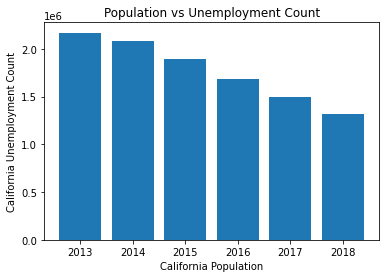

In [131]:
x_values = cali_data["Year"]
y_values = cali_data['Unemployment Count']
plt.bar(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Unemployment Count")
plt.show()

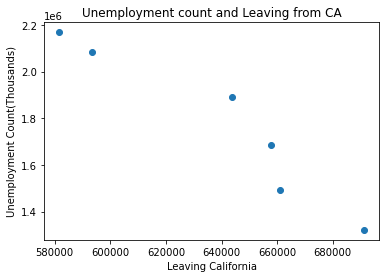

In [147]:
x_values = leaving_ca_df
y_values = cali_data['Unemployment Count']

plt.scatter(Leaving_CA, y_values)

# Set the label and width for the bar chart
width = 0.35

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.ylabel("Unemployment Count(Thousands)")
plt.xlabel("Leaving California")
plt.title("Unemployment count and Leaving from CA")
# plt.annotate(line_eq,(590000,1.4),fontsize=15,color="red")
plt.show()